#HW3 - PART 1

In [1]:
# import the necessary packages
import io
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#(1) Write a function which takes three inputs - (1) an HICP item code (a string), (2) a boolean (True or False) indicating if the series is seasonally adjusted or not, and (3) an indicator whether the series is in levels or as annual rate of change (for example, the parameter can be a string with one of two options - “INX” or “ANR”). The function should download the indicated adjusted or unadjusted HICP series in level (“INX”) or as rate of change (“ANR”) and returns a dataframe with datetime index and one series whose column name shows the item description, geo, and whether it is seasonally adjusted or unadjusted.

In [2]:
def dow(code, tof, loac):
    
    if tof == True: 
        d = 'Y'
        des = 'Season adjust'
        number = '3' 

    if tof == False: 
        d = 'N'
        des = 'Non season adjust'
        number = '4' 
    
    SDW_URL = "https://sdw-wsrest.ecb.europa.eu/service/data"
    series_code = f'ICP/M.U2.{d}.{code}.{number}.{loac}'
    ecburl = f"{SDW_URL}/{series_code}"
    response = requests.get(ecburl, headers={"Accept": "text/csv"})
    assert response.status_code == 200, 'Failed to get a correct reponse'

    df_series = pd.read_csv(io.StringIO(response.text))
    df_series = df_series[["TIME_PERIOD", "OBS_VALUE", "TITLE"]].copy()

    df_series.columns.values[0]='date'
    df_series.columns.values[1]=df_series.iloc[1,2], 'U2', des 
    new_index = pd.to_datetime(df_series.date)
    df_series.index=new_index
    df_series.drop('TITLE', axis=1, inplace=True)

    df_series.drop('date', axis=1, inplace=True)
    
    return df_series

#(2) Using the function from (1) download HICP in levels for U2, seasonally adjusted and unadjusted

In [3]:
#seasonally adjusted
df_hicp_adj=dow('000000', True, 'INX')
df_hicp_adj

,"(HICP - Overall index, U2, Season adjust)"
date,
1997-01-01,72.81590
1997-02-01,72.79135
1997-03-01,72.77147
1997-04-01,72.76303
1997-05-01,72.86884
...,...
2021-10-01,109.23965
2021-11-01,109.98325
2021-12-01,110.35422


In [4]:
#seasonally unadjusted
df_hicp_unadj=dow('000000', False, 'INX')
df_hicp_unadj

,"(HICP - Overall index, U2, Non season adjust)"
date,
1996-01-01,70.97
1996-02-01,71.29
1996-03-01,71.54
1996-04-01,71.66
1996-05-01,71.83
...,...
2021-10-01,109.41
2021-11-01,109.90
2021-12-01,110.37


#(3) Compute year on year inflation rates as per cent change from the previous year

In [5]:
infl_perc = pd.concat([df_hicp_adj.pct_change(periods=12)*100, df_hicp_unadj.pct_change(periods=12)*100], axis=1)
infl_perc

,"(HICP - Overall index, U2, Season adjust)","(HICP - Overall index, U2, Non season adjust)"
date,,
1996-01-01,NaN,NaN
1996-02-01,NaN,NaN
1996-03-01,NaN,NaN
1996-04-01,NaN,NaN
1996-05-01,NaN,NaN
...,...,...
2021-10-01,4.118637,4.051355
2021-11-01,4.745224,4.866412
2021-12-01,4.971192,4.964337


#(4) Compute year on year inflation rates as the 12-month difference in the log of the series

In [6]:
infl_log = pd.concat([np.log(df_hicp_adj).diff(periods=12)*100, np.log(df_hicp_unadj).diff(periods=12)*100], axis=1)
infl_log

,"(HICP - Overall index, U2, Season adjust)","(HICP - Overall index, U2, Non season adjust)"
date,,
1996-01-01,NaN,NaN
1996-02-01,NaN,NaN
1996-03-01,NaN,NaN
1996-04-01,NaN,NaN
1996-05-01,NaN,NaN
...,...,...
2021-10-01,4.036081,3.971439
2021-11-01,4.636078,4.751709
2021-12-01,4.851577,4.845046


#(5) Using the function from (1) download HICP in annual rate of change for U2, seasonally unadjusted.

In [7]:
df_hicp_unadj_anr=dow('000000', False, 'ANR')
df_hicp_unadj_anr

,"(HICP - Overall index, U2, Non season adjust)"
date,
1997-01-01,2.0
1997-02-01,1.8
1997-03-01,1.6
1997-04-01,1.3
1997-05-01,1.4
...,...
2021-10-01,4.1
2021-11-01,4.9
2021-12-01,5.0


#(6) Make a 2 by 2 plot showing each one of the four inflation series you calculated in (3) and (4) (per cent change adjusted and unadjusted, log-diff adjusted and unadjusted) and the ANR series you downloaded in (5).

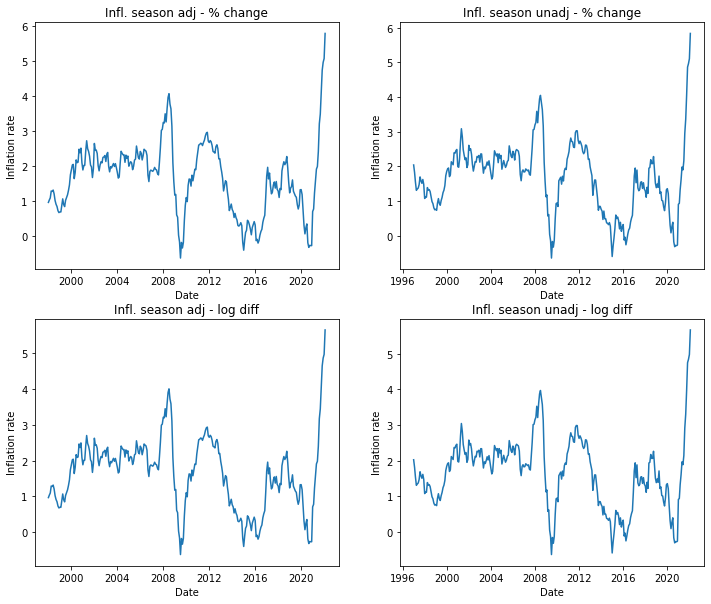

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12,10))
axs[0, 0].plot(infl_perc.index, infl_perc.iloc[:,0])
axs[0, 0].set_title('Infl. season adj - % change')
axs[0, 1].plot(infl_perc.index, infl_perc.iloc[:,1])
axs[0, 1].set_title('Infl. season unadj - % change')
axs[1, 0].plot(infl_log.index, infl_log.iloc[:,0])
axs[1, 0].set_title('Infl. season adj - log diff')
axs[1, 1].plot(infl_log.index, infl_log.iloc[:,1])
axs[1, 1].set_title('Infl. season unadj - log diff')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Inflation rate')

Text(0.5, 1.0, 'Inflation rate')

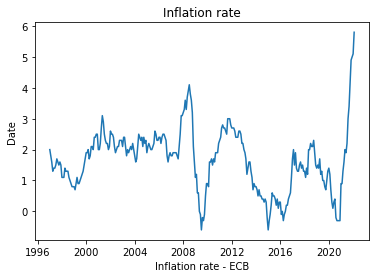

In [10]:
#comparing to the actual inflation downloaded from ECB

plt.plot(df_hicp_unadj_anr.index, df_hicp_unadj_anr.iloc[:,0])
plt.xlabel('Inflation rate - ECB')
plt.ylabel('Date')
plt.title('Inflation rate')

Text(0.5, 0.85, 'vs   Y-on-Y Inflation as 12-month difference log (seas. unadj.)')

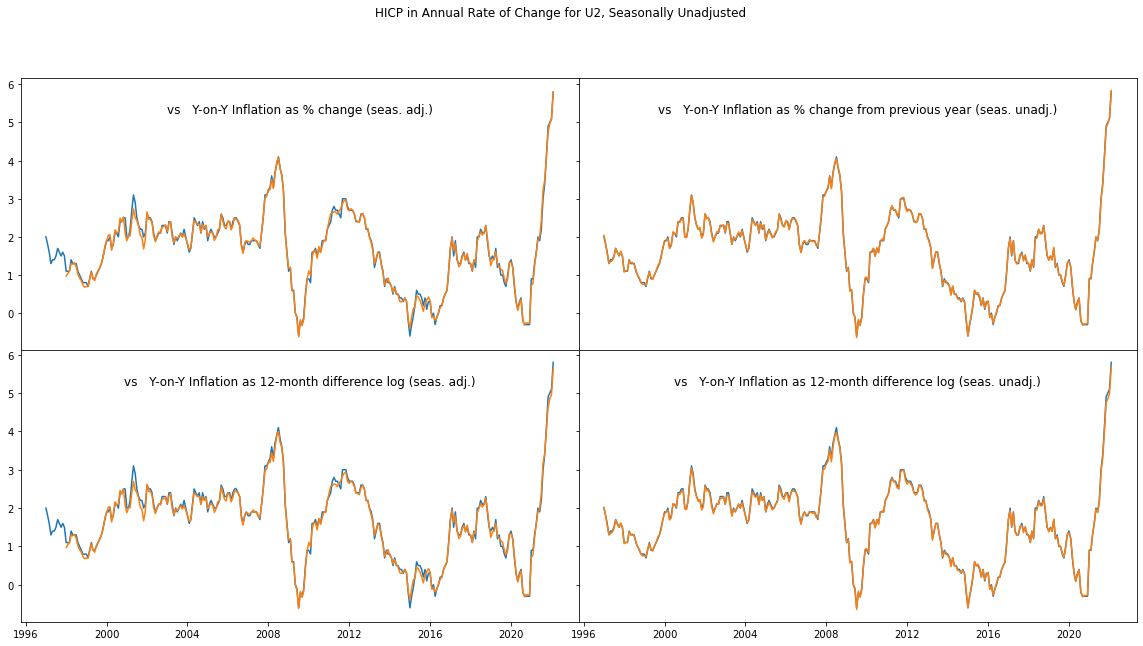

In [13]:
## alternatively  
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('HICP in Annual Rate of Change for U2, Seasonally Unadjusted')
ax1.plot(df_hicp_unadj_anr.index, df_hicp_unadj_anr.iloc[:,0], infl_perc.index, infl_perc.iloc[:,0])
ax1.set_title("vs   Y-on-Y Inflation as % change (seas. adj.)", y=0.85)
ax2.plot(df_hicp_unadj_anr.index, df_hicp_unadj_anr.iloc[:,0], infl_perc.index, infl_perc.iloc[:,1])
ax2.set_title("vs   Y-on-Y Inflation as % change from previous year (seas. unadj.)", y=0.85)
ax3.plot(df_hicp_unadj_anr.index, df_hicp_unadj_anr.iloc[:,0], infl_log.index, infl_log.iloc[:,0])
ax3.set_title("vs   Y-on-Y Inflation as 12-month difference log (seas. adj.)", y=0.85)
ax4.plot(df_hicp_unadj_anr.index, df_hicp_unadj_anr.iloc[:,0], infl_log.index, infl_log.iloc[:,1])
ax4.set_title("vs   Y-on-Y Inflation as 12-month difference log (seas. unadj.)", y=0.85)

#(7) Which of the two methods you used produces inflation series that is closer to the official inflation data?

In [15]:
#to solve this exercice an OLS-type approach was followed. 
#So, the series closer to the actual data is the one that minimizes the sum square resid.
#becasue actual inflation is computed based on unadjusted data, the same approach was considered here.

dif_perc_unadj = ((infl_perc.iloc[:,1] - df_hicp_unadj_anr.iloc[:,0])**2).sum()
dif_log_unadj = ((infl_log.iloc[:,1] - df_hicp_unadj_anr.iloc[:,0])**2).sum()

self_calculayed = {
    'percentage difference': dif_perc_unadj,
    'log difference': dif_log_unadj
}

minim = min(self_calculayed, key=self_calculayed.get)

print(f'Computing inflation based on {minim} produces a series that is closer to the official inflation data.')

Computing inflation based on percentage difference produces a series that is closer to the official inflation data.
